In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [116]:
base = 'cats_and_dogs'

In [117]:
train_images = os.path.join(base, 'train')
validation_images = os.path.join(base, 'validation')

In [118]:
train_images_cats = os.path.join(train_images, 'cats')
train_images_dogs = os.path.join(train_images, 'dogs')
validation_images_cats = os.path.join(validation_images, 'cats')
validation_images_dogs = os.path.join(validation_images, 'dogs')

In [119]:
num_cats_tr = len(os.listdir(train_images_cats))
num_dogs_tr = len(os.listdir(train_images_dogs))
num_cats_val = len(os.listdir(validation_images_cats))
num_dogs_val = len(os.listdir(validation_images_dogs))

In [120]:
total_train = num_cats_tr + num_dogs_tr
total_validation = num_cats_val + num_dogs_val

In [121]:
train_images_generator = ImageDataGenerator(rescale=1./255, #rescalar
                                            rotation_range=40, #rotacionar imagem
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2, #cisalhamento
                                            zoom_range=0.2, #zoom
                                            horizontal_flip=True, #inverter horizontalmente
                                            fill_mode='nearest')


validation_images_generator = ImageDataGenerator(rescale=1./255)


In [122]:
BATCH_SIZE = 32
IMG_SHAPE = 200

In [123]:
train_data_gen = train_images_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=train_images,
                                                            shuffle=True,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary'
                                                           )

validation_data_gen = train_images_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=validation_images,
                                                            shuffle=False,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary'
                                                           )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


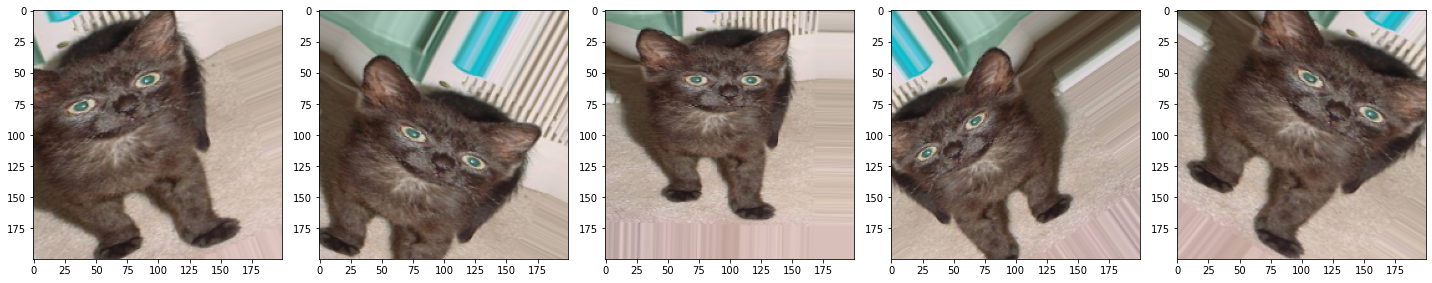

In [124]:
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)

In [125]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
                       
    keras.layers.Dense(2, activation='softmax')
                         
])

In [126]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 21, 21, 128)      

In [128]:
EPOCHS = 40

In [129]:
history = model.fit_generator(train_data_gen, 
                              steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
                              epochs=EPOCHS,
                              validation_data=validation_data_gen, 
                              validation_steps = int(np.ceil(total_validation / float(BATCH_SIZE)))
                              )

Epoch 1/40
63/63 [==============================] - 76s 1s/step - loss: 0.7288 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/40
63/63 [==============================] - 76s 1s/step - loss: 0.6933 - accuracy: 0.4975 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/40
63/63 [==============================] - 76s 1s/step - loss: 0.6935 - accuracy: 0.5195 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 4/40
63/63 [==============================] - 76s 1s/step - loss: 0.6922 - accuracy: 0.5140 - val_loss: 0.6911 - val_accuracy: 0.5130
Epoch 5/40
63/63 [==============================] - 76s 1s/step - loss: 0.6917 - accuracy: 0.5150 - val_loss: 0.6839 - val_accuracy: 0.5580
Epoch 6/40
63/63 [==============================] - 76s 1s/step - loss: 0.6921 - accuracy: 0.5595 - val_loss: 0.6903 - val_accuracy: 0.5390
Epoch 7/40
63/63 [==============================] - 76s 1s/step - loss: 0.6811 - accuracy: 0.5505 - val_loss: 0.6852 - val_accuracy: 0.5470
Epoch 8/40
63/63 [==

In [130]:
# analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

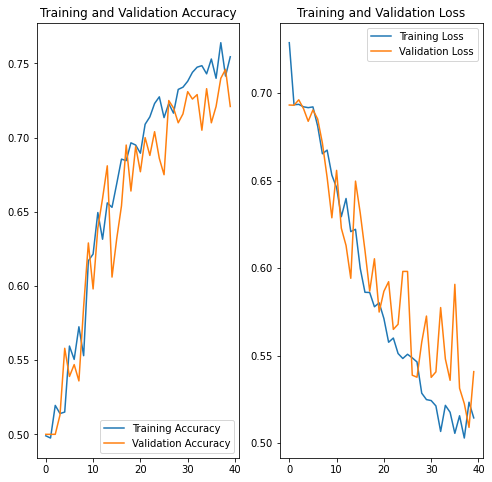

In [131]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()